# Excercise Analysis PCA
Author:  Ricardo Vallejo
    

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

# 1. LOAD DATA

In [4]:
# charger les données
data = pd.read_csv("data_banque_Aut21.csv", delimiter=";", decimal = ",")
# faire une copie
df = data.copy()
df.head()




,age,job,marital,education,housing,loan,duration
0,56,housemaid,married,"basic,4y",no,no,261
1,57,services,married,"high,school",no,no,149
2,40,"admin,",married,"basic,6y",no,no,151
3,56,services,married,"high,school",no,yes,307
4,45,services,married,"basic,9y",no,no,198


# 2. DATA DESCRIPTION

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40198 entries, 0 to 40197
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40198 non-null  int64 
 1   job        40198 non-null  object
 2   marital    40198 non-null  object
 3   education  40198 non-null  object
 4   housing    40198 non-null  object
 5   loan       40198 non-null  object
 6   duration   40198 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


In [6]:
# mettre la série Fromages en index
#df = df.set_index("Fromages")


In [7]:
df.describe()

,age,duration
count,40198.000000,40198.000000
mean,40.025847,258.484253
std,10.422343,259.387105
min,17.000000,0.000000
25%,32.000000,102.000000
50%,38.000000,180.000000
75%,47.000000,320.000000
max,98.000000,4918.000000


In [8]:
dfEncoded = pd.get_dummies(df)
dfEncoded 

,age,duration,"job_admin,",job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,"education_basic,9y","education_high,school",education_illiterate,"education_professional,course","education_university,degree",education_unknown,housing_no,housing_yes,loan_no,loan_yes
0,56,261,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,57,149,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
2,40,151,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,56,307,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
4,45,198,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40193,37,281,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
40194,29,112,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
40195,73,334,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
40196,56,189,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0


In [9]:
dfEncoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40198 entries, 0 to 40197
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            40198 non-null  int64
 1   duration                       40198 non-null  int64
 2   job_admin,                     40198 non-null  uint8
 3   job_blue-collar                40198 non-null  uint8
 4   job_entrepreneur               40198 non-null  uint8
 5   job_housemaid                  40198 non-null  uint8
 6   job_management                 40198 non-null  uint8
 7   job_retired                    40198 non-null  uint8
 8   job_self-employed              40198 non-null  uint8
 9   job_services                   40198 non-null  uint8
 10  job_student                    40198 non-null  uint8
 11  job_technician                 40198 non-null  uint8
 12  job_unemployed                 40198 non-null  uint8
 13  job_unknown     

# 3.  PREPROCESSING: Normaliser les variables

In [10]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [11]:
sc = StandardScaler()
# sc = RobustScaler()

* Note:
    * J'ai tester les deux, StandardScaler et RobustScaler. J'ai aps vu de différence flagrante si ce n'est qu'avec RobustScaler on aura 90% de variance expliqué avec les 3 premières composantes ACP contre 86% avec StandardScaler.

In [12]:
col_numeriques = dfEncoded.columns[0:]

dfstd = sc.fit_transform(dfEncoded[col_numeriques])
dfstd = pd.DataFrame(dfstd, columns = col_numeriques, index = dfEncoded.index)
dfstd.head()

,age,duration,"job_admin,",job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,"education_basic,9y","education_high,school",education_illiterate,"education_professional,course","education_university,degree",education_unknown,housing_no,housing_yes,loan_no,loan_yes
0,1.532703,0.009699,-0.582923,-0.537642,-0.19136,6.163549,-0.276398,-0.208585,-0.188619,-0.326295,...,-0.414508,-0.548434,-0.021166,-0.381962,-0.64813,-0.209557,1.076397,-1.076397,0.428993,-0.428993
1,1.628652,-0.422094,-0.582923,-0.537642,-0.19136,-0.162244,-0.276398,-0.208585,-0.188619,3.064711,...,-0.414508,1.823373,-0.021166,-0.381962,-0.64813,-0.209557,1.076397,-1.076397,0.428993,-0.428993
2,-0.002480,-0.414383,1.715492,-0.537642,-0.19136,-0.162244,-0.276398,-0.208585,-0.188619,-0.326295,...,-0.414508,-0.548434,-0.021166,-0.381962,-0.64813,-0.209557,1.076397,-1.076397,0.428993,-0.428993
3,1.532703,0.187042,-0.582923,-0.537642,-0.19136,-0.162244,-0.276398,-0.208585,-0.188619,3.064711,...,-0.414508,1.823373,-0.021166,-0.381962,-0.64813,-0.209557,1.076397,-1.076397,-2.331038,2.331038
4,0.477265,-0.233184,-0.582923,-0.537642,-0.19136,-0.162244,-0.276398,-0.208585,-0.188619,3.064711,...,2.412500,-0.548434,-0.021166,-0.381962,-0.64813,-0.209557,1.076397,-1.076397,0.428993,-0.428993


# 4. ANALYSIS DE CORRELATION

In [13]:
correlation_matrix = np.corrcoef(dfstd[col_numeriques].transpose())

pd.DataFrame(correlation_matrix.round(2), columns = col_numeriques, index = col_numeriques)

,age,duration,"job_admin,",job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,"education_basic,9y","education_high,school",education_illiterate,"education_professional,course","education_university,degree",education_unknown,housing_no,housing_yes,loan_no,loan_yes
age,1.00,-0.00,-0.10,-0.02,0.03,0.08,0.06,0.44,-0.00,-0.06,...,-0.04,-0.11,0.02,0.00,-0.07,0.07,0.00,-0.00,0.01,-0.01
duration,-0.00,1.00,-0.01,0.01,0.00,-0.01,-0.00,0.01,0.00,-0.00,...,0.01,0.00,0.00,-0.01,-0.01,0.00,0.01,-0.01,0.00,-0.00
"job_admin,",-0.10,-0.01,1.00,-0.31,-0.11,-0.09,-0.16,-0.12,-0.11,-0.19,...,-0.16,0.12,-0.01,-0.16,0.33,-0.05,-0.01,0.01,-0.02,0.02
job_blue-collar,-0.02,0.01,-0.31,1.00,-0.10,-0.09,-0.15,-0.11,-0.10,-0.18,...,0.37,-0.17,0.01,-0.13,-0.34,0.02,0.02,-0.02,0.01,-0.01
job_entrepreneur,0.03,0.00,-0.11,-0.10,1.00,-0.03,-0.05,-0.04,-0.04,-0.06,...,-0.00,-0.03,0.01,-0.02,0.05,-0.00,-0.00,0.00,0.01,-0.01
job_housemaid,0.08,-0.01,-0.09,-0.09,-0.03,1.00,-0.04,-0.03,-0.03,-0.05,...,-0.03,-0.03,0.00,-0.03,-0.06,-0.00,0.00,-0.00,0.00,-0.00
job_management,0.06,-0.00,-0.16,-0.15,-0.05,-0.04,1.00,-0.06,-0.05,-0.09,...,-0.07,-0.08,-0.01,-0.08,0.25,0.00,0.01,-0.01,0.00,-0.00
job_retired,0.44,0.01,-0.12,-0.11,-0.04,-0.03,-0.06,1.00,-0.04,-0.07,...,-0.04,-0.04,0.01,0.01,-0.06,0.01,0.00,-0.00,0.01,-0.01
job_self-employed,-0.00,0.00,-0.11,-0.10,-0.04,-0.03,-0.05,-0.04,1.00,-0.06,...,0.00,-0.07,0.02,-0.01,0.10,-0.02,0.00,-0.00,0.01,-0.01
job_services,-0.06,-0.00,-0.19,-0.18,-0.06,-0.05,-0.09,-0.07,-0.06,1.00,...,-0.05,0.35,-0.01,-0.07,-0.18,-0.01,0.00,-0.00,0.00,-0.00


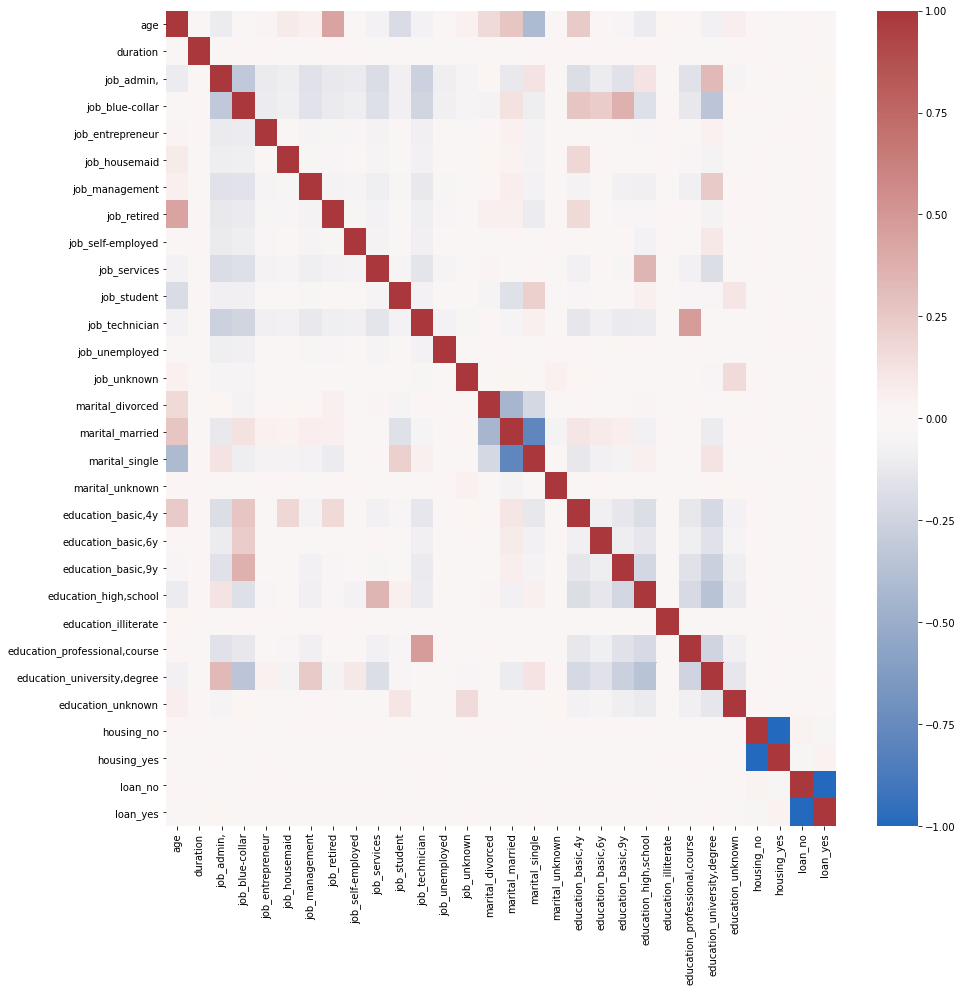

In [14]:
import seaborn as sns

dfCorrelation = correlation_matrix.astype('float')  # !! Neccessary for Heatmap
dfCorrelation = pd.DataFrame(correlation_matrix, columns = col_numeriques, index = col_numeriques)
plt.figure(figsize=(15,15))
sns.heatmap(dfCorrelation, annot=False, cmap="vlag")
plt.show()

# 5.  VARIANCE EXPLIQUE

# Calcule eigenvalues et eigenvecteurs

In [15]:
eig_vals, eig_vecs = np.linalg.eig(correlation_matrix)
eig_vals.astype('float').round(3)


array([ 2.561,  2.091,  1.914,  1.887,  1.768,  1.66 ,  0.407,  0.453,
        1.478,  0.61 ,  0.719,  1.268,  0.815,  1.19 ,  0.859,  1.142,
        0.921,  1.109,  1.067,  0.979,  0.99 ,  1.001,  1.026,  1.04 ,
        1.047,  0.   ,  0.   , -0.   , -0.   , -0.   ])

# Calcule de la variance Explique avec PCA

Explained variance ratio:  [0.085 0.07  0.064 0.063 0.059 0.055 0.049 0.042 0.04  0.038 0.037 0.036
 0.035 0.035 0.034 0.033 0.033 0.033 0.031 0.029 0.027 0.024 0.02  0.015
 0.014 0.    0.    0.    0.    0.   ]


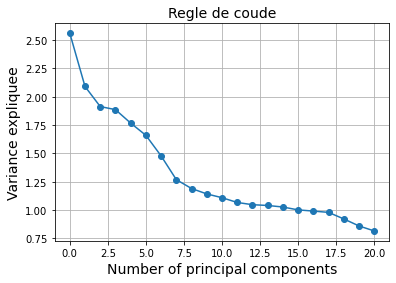

In [16]:
from sklearn.decomposition import PCA

# Numero de composants
Nmax = 21
Nmin = 2
N = 4

pca = PCA(n_components=None)
pca.fit(dfstd)

print('Explained variance ratio: ',pca.explained_variance_ratio_.round(3))
explained_variance=pca.explained_variance_

import matplotlib.pyplot as plt
plt.plot(np.arange(Nmax),explained_variance[:Nmax], marker='o')
plt.title('Regle de coude', fontsize=14)
plt.xlabel('Number of principal components', fontsize=14)
plt.ylabel('Variance expliquee', fontsize=14)
plt.grid(True)
plt.show()
None


# Calcule de la variance Explique Accumule avec PCA

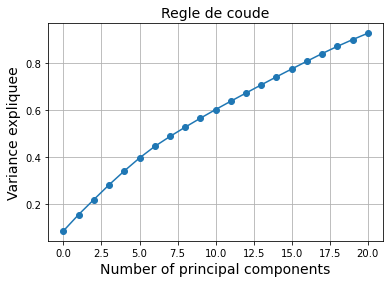

In [17]:
explained_variance_cumsum = pca.explained_variance_ratio_.cumsum()
explained_variance_cumsum

import matplotlib.pyplot as plt
plt.plot(np.arange(Nmax),explained_variance_cumsum[:Nmax], marker='o')
plt.title('Regle de coude', fontsize=14)
plt.xlabel('Number of principal components', fontsize=14)
plt.ylabel('Variance expliquee', fontsize=14)
plt.grid(True)
plt.show()
None



In [18]:
explained_variance_cumsum

array([0.08537237, 0.15507189, 0.21885781, 0.28174139, 0.34065886,
       0.39597796, 0.44523548, 0.48750796, 0.527168  , 0.56523542,
       0.60219145, 0.63774521, 0.67263862, 0.70730675, 0.74151838,
       0.77488643, 0.80790128, 0.84053199, 0.87124849, 0.89989239,
       0.92706695, 0.95102437, 0.97134678, 0.98644224, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

# Calcule Coefficient of Sihouette

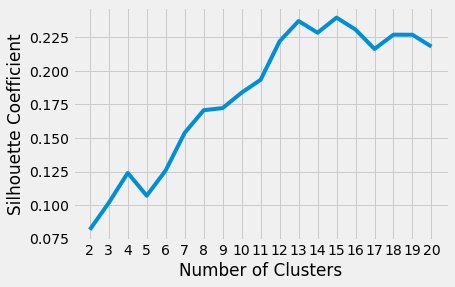

In [19]:
# Usinng Coefficient of Sihouette

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

kmeans_kwargs = {
 "init": "random",
 "n_init": Nmax,
 "max_iter": 300,
 "random_state": 42,
}

silhouette_coefficients2 = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(Nmin, Nmax):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(dfstd)
    score = silhouette_score(dfstd, kmeans.labels_)
    silhouette_coefficients2.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 21), silhouette_coefficients2)
plt.xticks(range(2, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#Siluete ca doit etre haut et inertie proche de zero

# ACP

In [20]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver = "full")

In [21]:
# calcul des nouvelles coordonnées
X_pca = pca.fit_transform(dfstd)
print('variances expliquées:\n',pca.explained_variance_ratio_.round(3))

variances expliquées:
 [0.085 0.07  0.064 0.063 0.059 0.055 0.049 0.042 0.04  0.038 0.037 0.036
 0.035 0.035 0.034 0.033 0.033 0.033 0.031 0.029 0.027 0.024 0.02  0.015
 0.014 0.    0.    0.    0.    0.   ]


In [22]:
sum(pca.explained_variance_ratio_.round(3))

1.0010000000000003

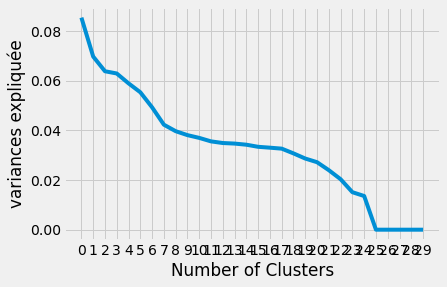

In [23]:
plt.style.use("fivethirtyeight")
plt.plot(range(0, 30), pca.explained_variance_ratio_)
plt.xticks(range(0, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("variances expliquée")
plt.show()

In [24]:
# valeur propre en fct des nouvelles variables
eigval = pca.explained_variance_
eigval.round(3)

array([2.561, 2.091, 1.914, 1.887, 1.768, 1.66 , 1.478, 1.268, 1.19 ,
       1.142, 1.109, 1.067, 1.047, 1.04 , 1.026, 1.001, 0.99 , 0.979,
       0.922, 0.859, 0.815, 0.719, 0.61 , 0.453, 0.407, 0.   , 0.   ,
       0.   , 0.   , 0.   ])

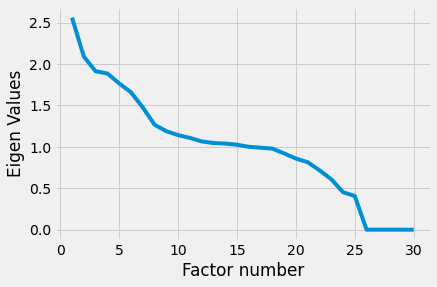

In [25]:
# les valeur propre en fct du numero de la nouvelle variable
plt.plot(np.arange(1,dfEncoded.shape[1]+1), eigval)
plt.ylabel("Eigen Values")
plt.xlabel("Factor number")
plt.show()

In [27]:
# vérification
percen = 0.90
pca = PCA(n_components = percen, svd_solver = "full")
X_pca = pca.fit_transform(dfstd)
print("Shape:",X_pca.shape)
print("avec", X_pca.shape[1], "dimension(s) on a: ", percen *100, "% de variance expliquée")

Shape: (40198, 21)
avec 21 dimension(s) on a:  90.0 % de variance expliquée


* Pas loins du cas idéal avec les 90 % de variance expliquée

## projection sur les composantes 0, 1

In [32]:
def plot_pca(cmp1,cmp2, X_pca=X_pca, df=df):
    import matplotlib.pyplot as plt
    f, ax= plt.subplots(figsize=(16,9))
    for i in range(df.shape[0]):
       # plt.annotate(df.index[i], (X_pca[i,cmp1], X_pca[i,cmp2]))
        plt.plot([X_pca[:,cmp1].min(),X_pca[:,cmp1].max()],[0,0],color = "silver", linestyle = "-", linewidth=1)
        plt.plot([0,0],[X_pca[:,cmp2].min(),X_pca[:,cmp2].max()],color = "silver", linestyle = "-", linewidth=1)
        ax.set_xlabel("X_pca_"+str(cmp1),fontsize=15)
        ax.set_ylabel("X_pca_"+str(cmp2),fontsize=15)
    plt.tight_layout() 
    plt.show()

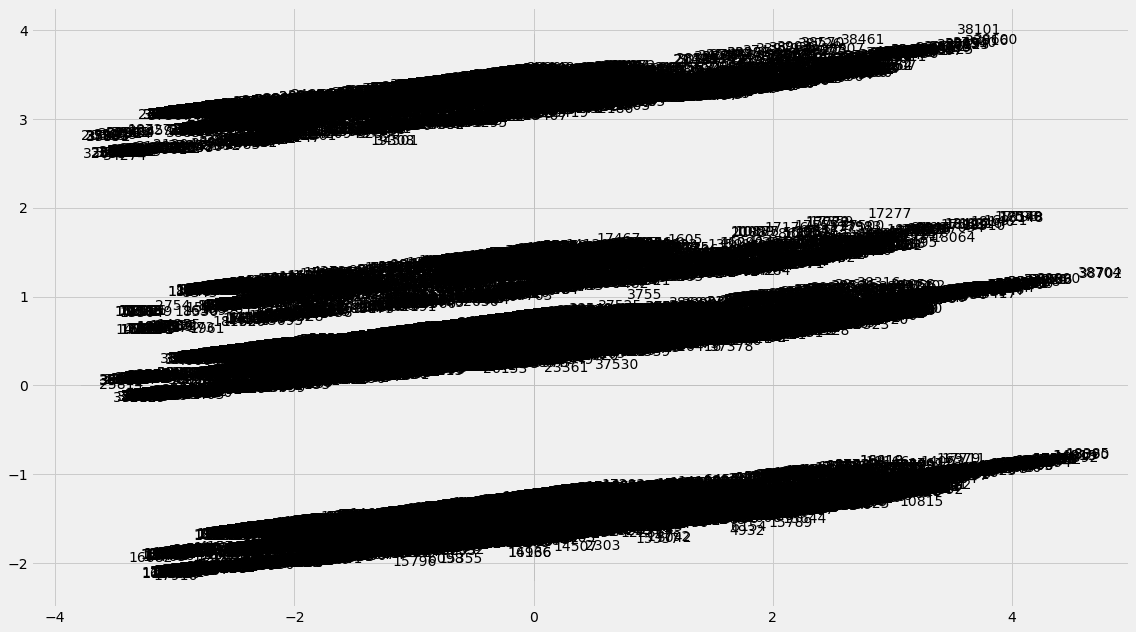

In [31]:
plot_pca(0, 1, X_pca, dfstd)

## projection sur les composantes 0, 2

In [ ]:
plot_pca(0,2,X_pca,df)

## projection sur les composantes 1, 2

In [ ]:
plot_pca(1,2,X_pca,df)

## projection PCA en 3D: composantes 0,1,2

 * **Note importante**
    * pour le plot 3D, une nouvelle fenetre s'ouvre et on peut faire tourner le graphique

In [50]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib
matplotlib.use('Qt5Agg')
ax = plt.axes(projection = "3d",)
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2],  s = 100)
ax.set_xlabel("X_pca_0")
ax.set_ylabel("X_pca_1")
ax.set_zlabel("X_pca_2")
n=dfstd.shape[0]
for i in range(n):
    ax.text(X_pca[i,0], X_pca[i,1], X_pca[i,2], "%s"%(dfstd.index[i]))

Using matplotlib backend: Qt5Agg


* **executer cette cellule pour remettre les plots sur le notebook(inline)**

In [51]:
# pip install mplot3d-dragger

In [52]:
%matplotlib inline



* **Note**:
    * Rien qu'avec la PCA et visuellement, on voit qu'un cluster se distinge, le groupe des fromages frais dans le graphique X_pca_1 en fonction de X_pca_0.
    * Dans le graphique 3D, si on regarde le plan X_pca0, X_pca1, il semble que les fromages se classe de haut en bas selon l'axe X_pca2
    * Confirmer le clusters avec KMeans

# Clustering: KMeans

In [53]:
from sklearn.cluster import KMeans
from sklearn import metrics

## recherche du nombre de clusters


In [56]:
# fonction pour calculer et visualiser les parametres silhouette et inertie
def plot_silhouette_inertie(df, k_range):
    from sklearn.cluster import KMeans
    from sklearn import metrics
    import matplotlib.pyplot as plt
    
    inertia = []
    res = []
    
    for k in k_range:
        model = KMeans(n_clusters=k, n_init=20, random_state=42).fit(df)
        res.append(metrics.silhouette_score(df, model.labels_))
        inertia.append(model.inertia_)

    #plot nb. clusters vs. silhouette score 
    plt.grid()
    plt.plot(k_range, res)
    plt.title("Silhouette")
    plt.xlabel("Nombre de classes")
    plt.ylabel("Coefficient de silhouette")
    plt.tight_layout()
    plt.show() 
    #plot nb. clusters vs. Inertie score 
    plt.grid()
    plt.plot(k_range, inertia)
    plt.title("Inertie")
    plt.xlabel("Nombre de classes")
    plt.ylabel("Coefficient d'inertie")
    plt.tight_layout()
    plt.show() 

In [ ]:
plot_silhouette_inertie(X_pca, range(2,10,1))

* Note:
    * le score silhouette est un peux mieux avec ACP
    * Le facteur silhouette n'est pas très élevé: 0.475
    * Point d'inflexion pour Nombre de classes = 4
    * on va choisir 4 clusters même si 5 parait etre un bon candidat

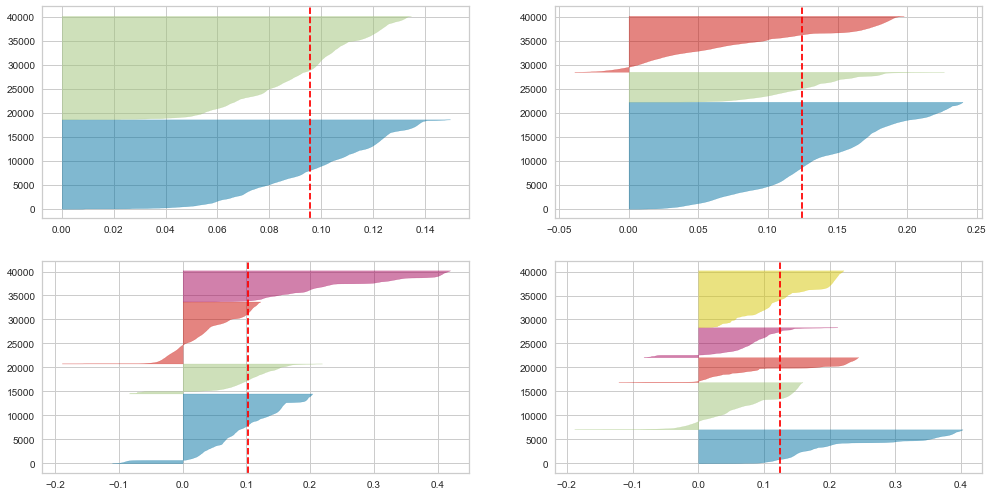

In [54]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_pca)

In [57]:
# pip install yellowbrick

* Note:
    * Aucun cluster n'est en dessous de la limite
    * Un cluster est beaucoup plus rempli que les autres
    * Les clusters semblent bien détachés les uns par rapport aux autres meme si le score est < 0.5
    * Ca confirme que 4 cluster est le meilleur choix

In [58]:
nbr_cluster = 4
km = KMeans(n_clusters = nbr_cluster, n_init=20, random_state=42)     
# on peut entrainer le modèle et obtenir les labels en meme temps avec fit_predict
prediction = km.fit_predict(X_pca)
prediction

array([3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 0, 1, 2, 0, 1, 0, 1, 2,
       1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 1, 0, 1,
       1, 2, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 2, 0, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 1, 1, 1, 2, 2,
       2, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 3, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2,
       1, 2, 1, 2, 1, 2, 0, 1])

## visualiser comment sont classées nos données: visualiser les clusters

In [59]:
def plot_cmpv2(cmp1,cmp2, X_pca=X_pca, dfstd=dfstd, prediction=prediction):
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
#
    nbr_cluster = len(np.unique(prediction))
    colors = colors = cm.nipy_spectral(prediction/nbr_cluster)

    # visualiser comment sont classées nos données: visualiser les clusters
    plt.figure(figsize=(16,9))

    for k in range(nbr_cluster):
        plt.scatter(X_pca[prediction == k,cmp1], X_pca[prediction == k,cmp2], c = colors[prediction == k], s = 100 
                     )
    plt.xlabel("X_pca_"+str(cmp1),fontsize=15)
    plt.ylabel("X_pca_"+str(cmp2),fontsize=15)
    
    # positions finales des centroides
    plt.scatter(km.cluster_centers_[:,cmp1], km.cluster_centers_[:,cmp2], c = 'r', marker = '+', s = 100,
               alpha=0.75, linewidth= 1.5)

    # mettre le nom des fromages
    for i, idx in enumerate(dfstd.index):
        plt.annotate(idx, (X_pca[i,cmp1], X_pca[i,cmp2]))
        
    plt.tight_layout()

### composantes: 0, 1

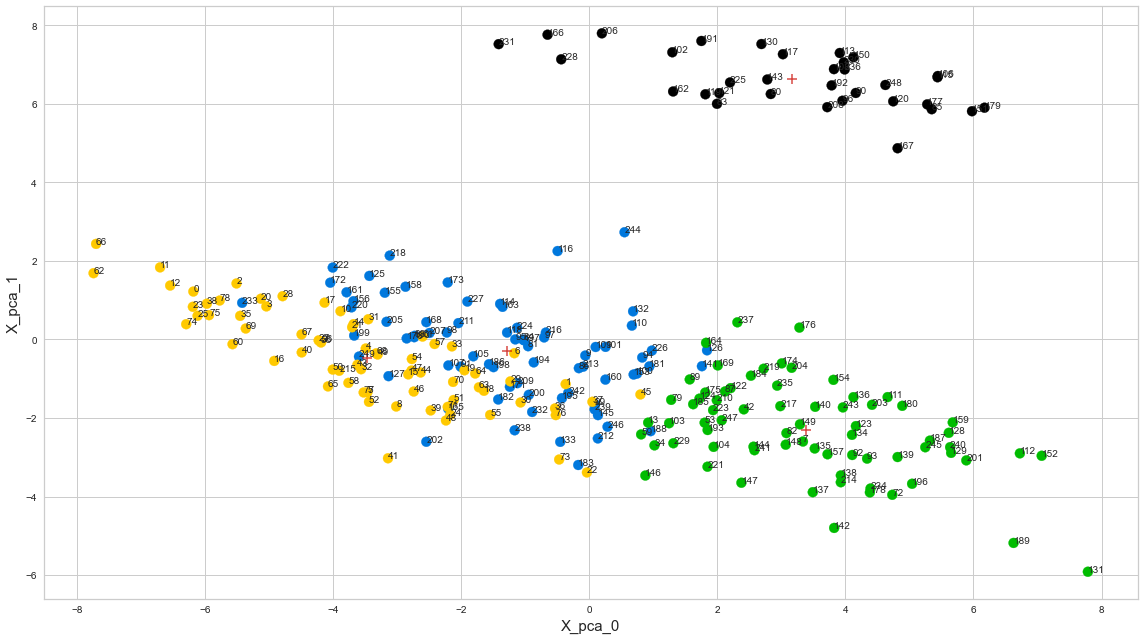

In [60]:
plot_cmpv2(0,1,X_pca,dfstd,prediction)

### composantes: 0, 2

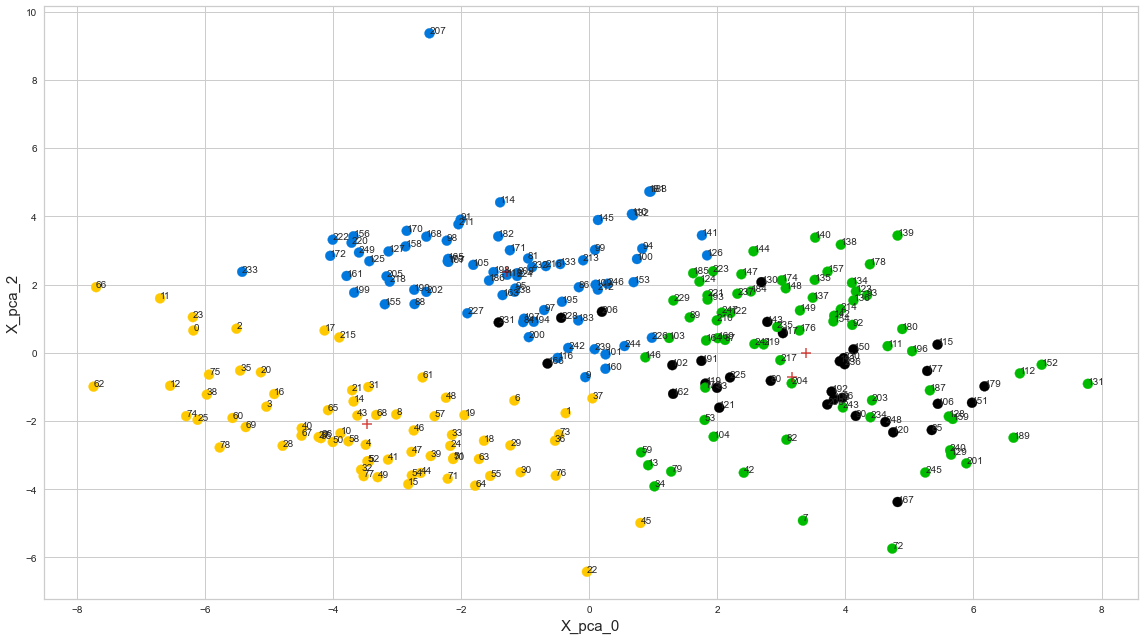

In [61]:
plot_cmpv2(0,2,X_pca,dfstd,prediction)

### composantes: 1, 2

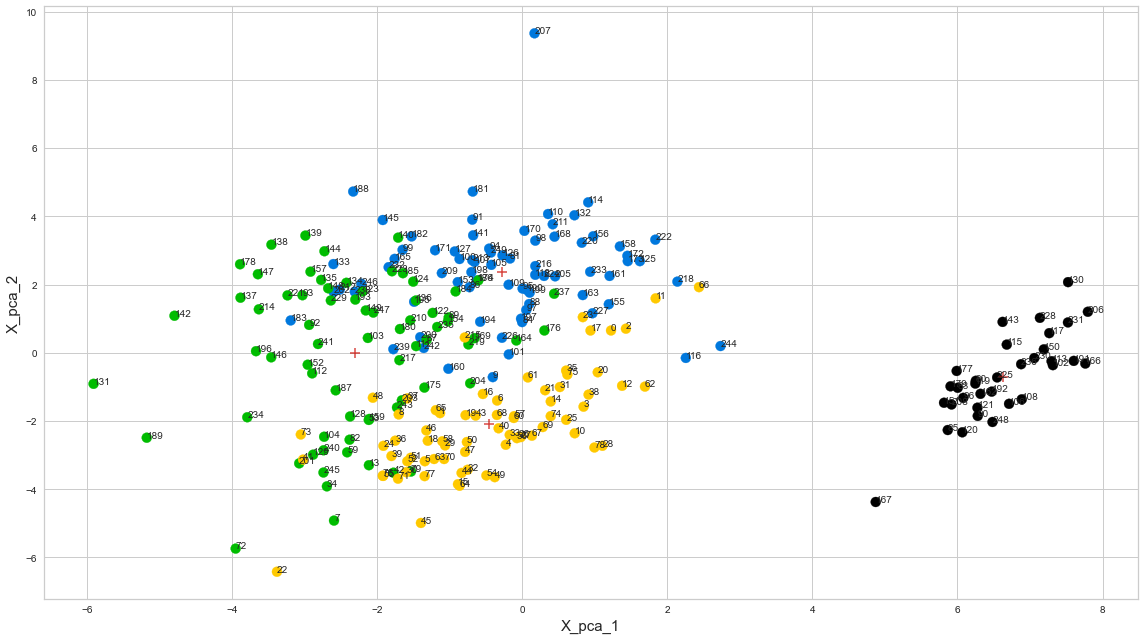

In [62]:
plot_cmpv2(1,2,X_pca,dfstd,prediction)

## plot 3D: composantes 0,1,2

 * **Note importante**
    * pour le plot 3D, une nouvelle fenetre s'ouvre et on peut faire tourner le graphique pour bien observer les clusters 

In [174]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib
nbr_cluster = len(np.unique(prediction))
colors = colors = cm.nipy_spectral(prediction/nbr_cluster)
    
ax = plt.axes(projection = "3d",)
for k in range(nbr_cluster):
    ax.scatter(X_pca[prediction == k,0], X_pca[prediction == k,1], X_pca[prediction == k,2],
               c = colors[prediction == k], s = 100, alpha=0.9, edgecolors="grey", linewidth= 1.5) 

ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], km.cluster_centers_[:,2], c = 'r', marker = '+', s = 100,
               alpha=0.5, linewidth= 1.5)
ax.set_xlabel("X_pca_0")
ax.set_ylabel("X_pca_1")
ax.set_zlabel("X_pca_2")
n=dfstd.shape[0]
for i in range(n):
    ax.text(X_pca[i,0], X_pca[i,1], X_pca[i,2], "%s"%(dfstd.index[i]))

Using matplotlib backend: Qt5Agg


* **executer cette cellule pour remettre les plots sur le notebook(inline)**

In [175]:
%matplotlib inline

## Valider les clusters


https://gdcoder.com/silhouette-analysis-vs-elbow-method-vs-davies-bouldin-index-selecting-the-optimal-number-of-clusters-for-kmeans-clustering/

### score silhouette par cluster

In [69]:
for nbr in range(nbr_cluster):
    print("cluster", nbr)
    print("score silhouette:", metrics.silhouette_score(X_pca, prediction==nbr))
    print("")


cluster 0
score silhouette: 0.3329224065377133

cluster 1
score silhouette: 0.20658689120872106

cluster 2
score silhouette: 0.1819663827438108



### somme des distances par rapport au centre d'un cluster

In [177]:
distances = km.fit_transform(X_pca)
for label in range(nbr_cluster): 
    print("cluster ", label)
    print("somme_distance:", distances[:,label].sum())  #Cohesion
    print("")

cluster  0
somme_distance: 94.49516891870043

cluster  1
somme_distance: 66.4108991424043

cluster  2
somme_distance: 122.3130999524644

cluster  3
somme_distance: 98.67029834863558



### index Davies_bouldin

evaluates intra-cluster similarity and inter-cluster differences while the Silhouette score measure the distance between each data point,

Entre mas pquena mas cohesion.

In [178]:
for label in np.unique(prediction):
    print("cluster:", label)
    print("nbr_element dans le cluster:", dfstd.groupby(prediction).size()[label])
    print("davies_bouldin_score:",metrics.davies_bouldin_score(dfstd, prediction == label).round(3))
    print("liste d'individus:\n")
    idk=np.argsort(prediction)
    dfname = pd.DataFrame(dfstd.index[idk], prediction[idk])
    dfname[dfname.index == label].apply(lambda x: print(x.values))
    print("="*50)

cluster: 0
nbr_element dans le cluster: 6
davies_bouldin_score: 1.38
liste d'individus:

['CarreDelEst' 'Camembert' 'Chabichou' 'Chaource' 'Coulommier'
 'Fr.ChevrePateMolle']
cluster: 1
nbr_element dans le cluster: 14
davies_bouldin_score: 2.544
liste d'individus:

['Tome' 'SaintPaulin' 'Roquefort' 'Reblochon' 'Pyrenees' 'PontLevesque'
 'Morbier' 'Maroilles' 'Fr.fondu.45' 'Cheddar' 'Cantal' 'Bleu' 'Babybel'
 'Vacherin']
cluster: 2
nbr_element dans le cluster: 4
davies_bouldin_score: 0.746
liste d'individus:

['Fr.Frais20nat' 'Fr.Frais40nat' 'PetitSuisse40' 'Yaourtlaitent.nat']
cluster: 3
nbr_element dans le cluster: 5
davies_bouldin_score: 0.994
liste d'individus:

['Emmental' 'Edam' 'Parmesan' 'Comte' 'Beaufort']


* Notes:
    * Un cluster avec un index > 2.
    * On observe des indexes très proches de 1. Ceci peut s'expliquer par le fait qu'on a peu d'individus, que les clusters ne sont pas vraiment globulaires et aussi, que le facteur silhouette est de 0.475 pour 4 clusters et donc l'index peut être biaisé.
    * Meme si le cluster avec l'index 0.62 se détache bien du reste, l'indexe est faible car il ne contient pas beaucoup de fromages. il a une structure très lacunaire. On le voit avec la somme des distances qui est très grande au regard du nombre d'individus.

## Caracteriser les clusters

In [179]:
# definir une fonction utile pour avoir les métriques
def get_metriques(df=df, prediction = prediction):
    # calcul de la moyenne par variable
    m = df.mean()

    #TSS = 1/N * variance de chaque variable
    TSS = df.shape[0]*df.var(ddof = 0)
    dfTSS = pd.DataFrame(TSS, columns = ["TSS"])

    # ecart entre moyenne du cluster et la moyenne pour tous les fromages
    #pour chaque groupe écart à la moyenne par variable
    ecart = (df.groupby(prediction).mean() - m)**2
    # pndérer l'écart
    ecartp = ecart.multiply(df.groupby(prediction).size(), axis = 0)
    # calcule de BSS
    BSS = np.sum(ecartp, axis = 0)
    dfBSS = pd.DataFrame(BSS, columns = ["BSS"])

    #carré du rapport de corrélation
    #variance expliquée par l'appartenance aux groupes
    #pour chaque variable
    R2 = BSS/TSS
    dfr2 = pd.DataFrame(R2, columns = ["R2"])
    return pd.concat([dfTSS,dfBSS,dfr2], axis = 1)

In [180]:
# index trié des labels(prediction)
idk=np.argsort(prediction)

* **Indications:**
    * Ligne Moyenne totale: est la Moyenne des variables initiales sur tous les fromages (tout le dataset)
    * Les autres valeurs sont la moyenne de la variables dans chaque cluster

In [181]:
# Afficher les deux moyennes
pd.concat([df.groupby(prediction).mean(), pd.DataFrame(df.mean(),columns = ["Moyenne_totale"]).T])

,Calories,Sodium,Calcium,Retinol,Folates,Proteines,Magnesium
0,288.000000,252.916667,110.100000,95.866667,31.266667,18.883333,21.666667
1,334.285714,267.428571,199.700000,60.050000,7.728571,21.228571,27.142857
2,101.750000,44.750000,133.750000,55.150000,16.475000,7.200000,11.250000
3,377.200000,130.400000,278.980000,64.560000,3.120000,29.120000,45.400000
Moyenne_totale,300.034483,210.086207,185.734483,67.562069,13.010345,20.168966,26.965517


In [182]:
# Difference des deux moyennes
df.groupby(prediction).mean()-df.mean()

,Calories,Sodium,Calcium,Retinol,Folates,Proteines,Magnesium
0,-12.034483,42.830460,-75.634483,28.304598,18.256322,-1.285632,-5.298851
1,34.251232,57.342365,13.965517,-7.512069,-5.281773,1.059606,0.177340
2,-198.284483,-165.336207,-51.984483,-12.412069,3.464655,-12.968966,-15.715517
3,77.165517,-79.686207,93.245517,-3.002069,-9.890345,8.951034,18.434483


* Note:
    * On voit que le cluster 1 a une moyenne très basse par rapport aux autres pour la variable Calories, de même pour Lipides et Cholesterol puisqu'elles sont fortement corrélées. Donc elles peuvent typer le cluster 1. Même chose pour le Sodium qui est très bas. C'est donc des variables qui vont caracteriser le cluster 1
    * Moyenne de Retinol ne varie pas beaucoup pour les clusters 0,1 et 2
    * Retinol et Folates ne semblent pas interessants pour typer un cluster
    * Cluster 1, sauf pour le Folates a toutes les variables en dessous de la moyenne

In [183]:
# relation variance cluster / variable
get_metriques(df, prediction)

,TSS,BSS,R2
Calories,236550.965517,204332.558374,0.863799
Sodium,330711.034483,198134.447578,0.599117
Calcium,147292.285517,91337.127517,0.620108
Retinol,16347.948276,6258.237943,0.382815
Folates,3848.226897,2927.429492,0.760722
Proteines,1356.282069,1099.017164,0.810316
Magnesium,3586.965517,2855.967898,0.796207


* Notes:
    * On voit que Calories avec un R2 de 0.88 et donc lipides et cholesterol caracterisent bien le cluster car elles très impliquées dans la variance du cluster
    * Potentiellement, elles sont importantes pour distinguer les clusters

### stocker les predictions de KMeans dans le dataframe d'origine

In [184]:
df = df.assign(Prediction = prediction)
df.head(10)

,Calories,Sodium,Calcium,Retinol,Folates,Proteines,Magnesium,Prediction
Fromages,,,,,,,,
CarreDelEst,314,353.5,72.6,51.6,30.3,21.0,20,0
Babybel,314,238.0,209.8,63.7,6.4,22.6,27,1
Beaufort,401,112.0,259.4,54.9,1.2,26.6,41,3
Bleu,342,336.0,211.1,37.1,27.5,20.2,27,1
Camembert,264,314.0,215.9,103.0,36.4,23.4,20,0
Cantal,367,256.0,264.0,48.8,5.7,23.0,30,1
Chabichou,344,192.0,87.2,90.1,36.3,19.5,36,0
Chaource,292,276.0,132.9,116.4,32.5,17.8,25,0
Cheddar,406,172.0,182.3,76.4,4.9,26.0,28,1


In [185]:
# sauvegarder dans un fichier csv
df.to_csv("Fromages_avec_predictions_KMeans.csv", index=True)

# CAH

In [63]:
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

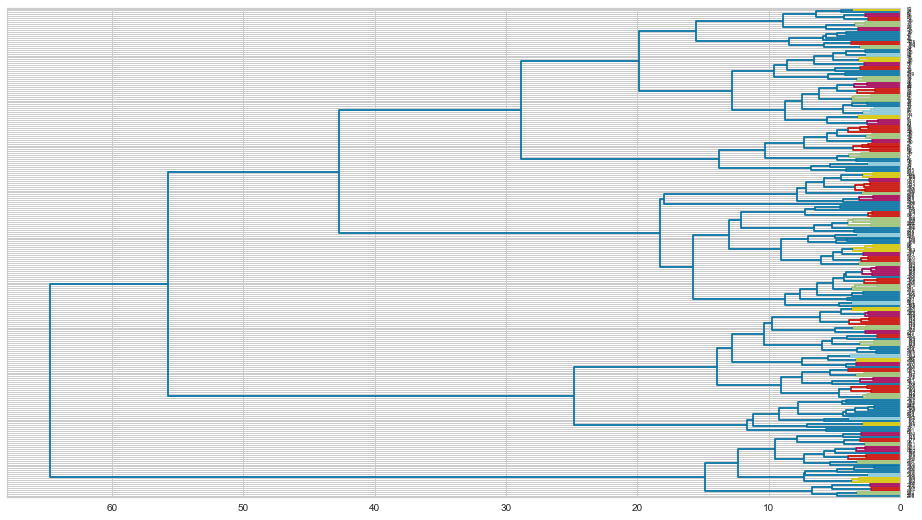

In [64]:
#générer la matrice des liens
Z = linkage(X_pca,method='ward',metric='euclidean')

#affichage du dendrogramme
plt.figure(figsize=(16, 9))
dendrogram(Z,labels=dfstd.index,orientation='left',color_threshold= 4)

plt.show()

* Notes:
    * Le CAH suggere 5 clusters, c'est vrai qu'avec 5 clusters on ne perd pas beaucoup en silhouette et on baisse encore l'inertie et c'est aussi un point d'inflexion.

## nombre de cluster = 5

In [65]:
nbr_cluster = 3
km = KMeans(n_clusters = nbr_cluster, n_init=20, random_state=42)     
# on peut entrainer le modèle et obtenir les labels en meme temps avec fit_predict
prediction = km.fit_predict(X_pca)
prediction

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2,
       1, 2, 0, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0, 1, 0, 2,
       2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 1, 1, 1, 2, 2,
       2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 0, 2, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 0, 1])

## 3D

In [66]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib
nbr_cluster = len(np.unique(prediction))
colors = colors = cm.nipy_spectral(prediction/nbr_cluster)
    
ax = plt.axes(projection = "3d",)
for k in range(nbr_cluster):
    ax.scatter(X_pca[prediction == k,0], X_pca[prediction == k,1], X_pca[prediction == k,2],
               c = colors[prediction == k], s = 100, alpha=0.9, edgecolors="grey", linewidth= 1.5) 

ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], km.cluster_centers_[:,2], c = 'r', marker = '+', s = 100,
               alpha=0.5, linewidth= 1.5)
ax.set_xlabel("X_pca_0")
ax.set_ylabel("X_pca_1")
ax.set_zlabel("X_pca_2")
n=dfstd.shape[0]
for i in range(n):
    ax.text(X_pca[i,0], X_pca[i,1], X_pca[i,2], "%s"%(dfstd.index[i]))

Using matplotlib backend: Qt5Agg


In [67]:
%matplotlib inline

* Note: avec le 3d, on a voit une belle séparation des clusters, reste le FR,ChevretPateMolle qui est clairement un outlier et qui tire un peu.
* En réalité, c'est le cluster (anciennement 0, quand on a fait nbr_cluster = 4) qui a étét divisé en deux

In [68]:
for label in np.unique(prediction):
    print("cluster:", label)
    print("nbr_element dans le cluster:", dfstd.groupby(prediction).size()[label])
    print("davies_bouldin_score:",metrics.davies_bouldin_score(dfstd, prediction == label).round(3))
    print("liste d'individus:\n")
    idk=np.argsort(prediction)
    dfname = pd.DataFrame(dfstd.index[idk], prediction[idk])
    dfname[dfname.index == label].apply(lambda x: print(x.values))
    print("="*50)

cluster: 0
nbr_element dans le cluster: 33
davies_bouldin_score: 1.2
liste d'individus:

[ 85 191 192 120 119 179 117 177 115 162 113 206 108 208 106 121 130 143
 151  80 236  90 166 231 102 230 167 225  96  83 150 228 248]
cluster: 1
nbr_element dans le cluster: 122
davies_bouldin_score: 1.982
liste d'individus:

[127 155 114 118 116 107 105 101  98  97  95  91  88  86 125 156   0 161
 209 211 215 216 218 220 207 222 227 232 233 238 242 244 224 158 205 200
 163 165 170 171 172 173 202 182 190 194 195 197 198 199 186 168 249  43
  84  14  27  28  41  12  15  11  40  10  56   9  57  58  55  39  44  17
  50  51  23  48  52  21  16  20  47  18  46  25  54  26  19  24   8  60
  81  35  33  78   1  32   2  77  76  75  74  36  31  38  30   3  71  61
  62  63  64  65  66   4  67   5  29  68  69  70   6  49]
cluster: 2
nbr_element dans le cluster: 95
davies_bouldin_score: 2.066
liste d'individus:

[196 193 201 189 221 204 247 246 245 243 241 240 239 237 235 234   7 229
 226 223  13 188 219 217

* Notes:
    * Cluster 1 et cluster4  avec un index > 2. Ces deux clusters contiennent le plus grand nombre d'individus

In [49]:
# Afficher les deux moyennes
pd.concat([df.groupby(prediction).mean(), pd.DataFrame(df.mean(),columns = ["Moyenne_totale"]).T])

,Calories,Sodium,Calcium,Retinol,Folates,Proteines,Magnesium,Prediction
0,324.500000,330.916667,136.483333,62.583333,17.316667,19.833333,20.833333,0.666667
1,377.200000,130.400000,278.980000,64.560000,3.120000,29.120000,45.400000,3.000000
2,101.750000,44.750000,133.750000,55.150000,16.475000,7.200000,11.250000,2.000000
3,276.500000,235.500000,127.200000,115.000000,34.050000,17.950000,24.250000,0.000000
4,335.500000,233.400000,212.870000,58.040000,5.570000,21.970000,28.800000,1.000000
Moyenne_totale,300.034483,210.086207,185.734483,67.562069,13.010345,20.168966,26.965517,1.275862


In [50]:
# Difference des deux moyennes
df.groupby(prediction).mean()-df.mean()

,Calories,Sodium,Calcium,Retinol,Folates,Proteines,Magnesium,Prediction
0,24.465517,120.830460,-49.251149,-4.978736,4.306322,-0.335632,-6.132184,-0.609195
1,77.165517,-79.686207,93.245517,-3.002069,-9.890345,8.951034,18.434483,1.724138
2,-198.284483,-165.336207,-51.984483,-12.412069,3.464655,-12.968966,-15.715517,0.724138
3,-23.534483,25.413793,-58.534483,47.437931,21.039655,-2.218966,-2.715517,-1.275862
4,35.465517,23.313793,27.135517,-9.522069,-7.440345,1.801034,1.834483,-0.275862


In [51]:
get_metriques(df, prediction)

,TSS,BSS,R2
Calories,236550.965517,205424.415517,0.868415
Sodium,330711.034483,236712.476149,0.715768
Calcium,147292.285517,89905.738184,0.610390
Retinol,16347.948276,10718.153943,0.655627
Folates,3848.226897,2972.632063,0.772468
Proteines,1356.282069,1126.189736,0.830351
Magnesium,3586.965517,2975.832184,0.829624
Prediction,27.793103,26.459770,0.952026


* Note:
    * cluster 0 et cluster 1 se distinguent des autres maintenant
    * Il faut vérifier si le clustering a du sens avec un expert métier ou une recherche sur le net
    * Je pense quand meme que le bon nombre reste 4 clusters, puisque c'est le cluster0 qui a été coupé en deux, en plus mettre le Coulommier avec le Roquefort, personnelement et sans etre un connaisseur, j ene l'aurais aps fait

# Réduire le dataset

In [52]:
# repartir sur une bonne base
df = data.copy()
df.head()

,Fromages,Calories,Sodium,Calcium,Retinol,Folates,Proteines,Magnesium
0,CarreDelEst,314,353.5,72.6,51.6,30.3,21.0,20
1,Babybel,314,238.0,209.8,63.7,6.4,22.6,27
2,Beaufort,401,112.0,259.4,54.9,1.2,26.6,41
3,Bleu,342,336.0,211.1,37.1,27.5,20.2,27
4,Camembert,264,314.0,215.9,103.0,36.4,23.4,20


In [53]:
df = df.set_index("Fromages")

In [54]:
list_fromages = ["Yaourtlaitent.nat", "Fr.Frais20nat", "Fr.Frais40nat", "PetitSuisse40"]

In [55]:
df = df.drop(labels = list_fromages, axis = 0)
df.shape

(25, 7)

In [56]:
dfstd = sc.fit_transform(df)
dfstd = pd.DataFrame(dfstd, columns = df.columns, index = df.index)
dfstd.head()

,Calories,Sodium,Calcium,Retinol,Folates,Proteines,Magnesium
Fromages,,,,,,,
CarreDelEst,-0.393814,1.305009,-1.729552,-0.725392,1.498935,-0.262805,-0.961510
Babybel,-0.393814,0.016290,0.224261,-0.236355,-0.508717,0.075208,-0.251534
Beaufort,1.535341,-1.389585,0.930596,-0.592019,-0.945528,0.920240,1.168417
Bleu,0.227064,1.109749,0.242774,-1.311429,1.263729,-0.431812,-0.251534
Camembert,-1.502523,0.864279,0.311129,1.352007,2.011348,0.244214,-0.961510


In [57]:
pca = PCA(svd_solver = "full")
X_pca = pca.fit_transform(dfstd)
print('variances expliquées:\n',pca.explained_variance_ratio_)

variances expliquées:
 [0.55861181 0.15843187 0.09961729 0.08129354 0.04475043 0.04177621
 0.01551887]


In [58]:
eigval = pca.explained_variance_
eigval

array([4.07321109, 1.15523236, 0.72637604, 0.59276537, 0.32630519,
       0.30461817, 0.11315845])

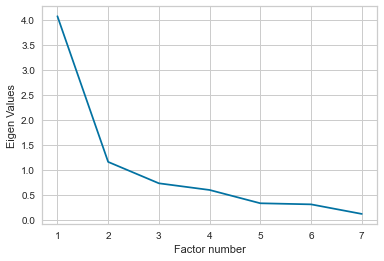

In [59]:
plt.plot(np.arange(1,df.shape[1]+1), eigval)
plt.ylabel("Eigen Values")
plt.xlabel("Factor number")
plt.show()

In [60]:
percen = 0.81
pca = PCA(n_components = percen, svd_solver = "full")
X_pca = pca.fit_transform(dfstd)
X_pca.shape
print("avec", X_pca.shape[1], "dimensions on a: ", percen *100, "% de variance expliquée")

avec 3 dimensions on a:  81.0 % de variance expliquée


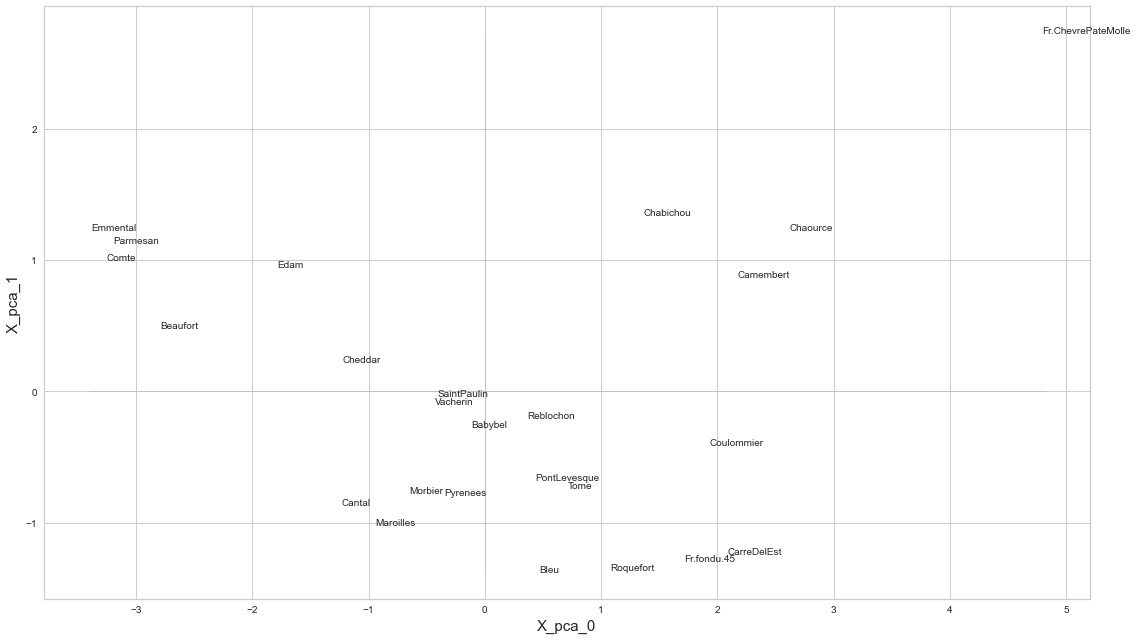

In [61]:
plot_pca(0, 1, X_pca, dfstd)

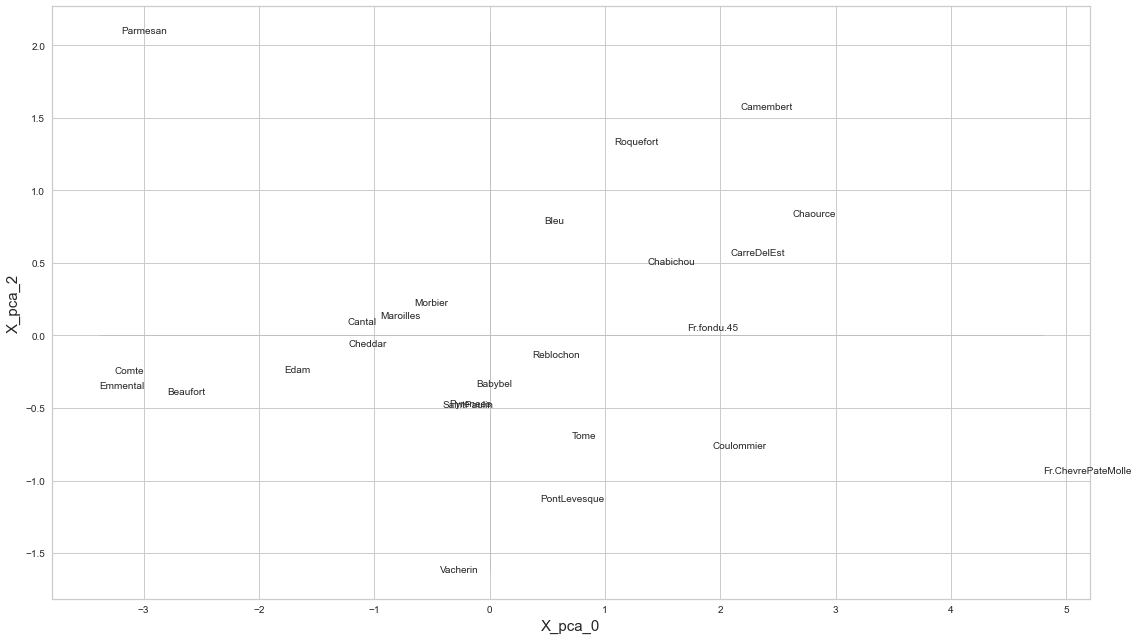

In [62]:
plot_pca(0, 2, X_pca, dfstd)

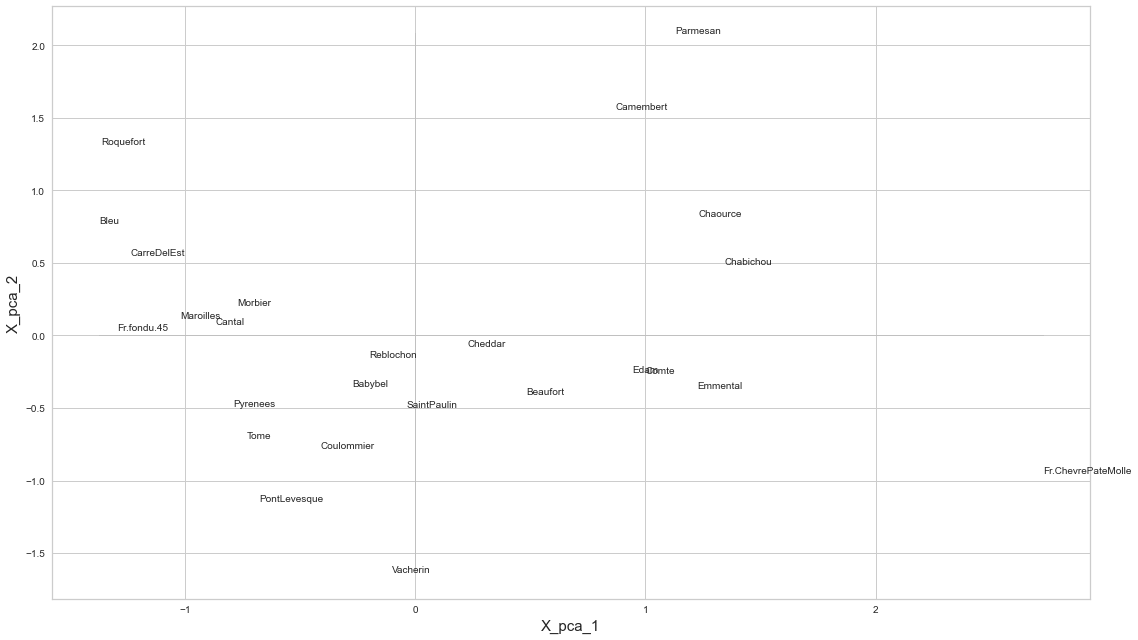

In [63]:
plot_pca(1, 2, X_pca, dfstd)

In [80]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib
ax = plt.axes(projection = "3d",)
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2],  s = 100)
ax.set_xlabel("X_pca_0")
ax.set_ylabel("X_pca_1")
ax.set_zlabel("X_pca_2")
n=dfstd.shape[0]
for i in range(n):
    ax.text(X_pca[i,0], X_pca[i,1], X_pca[i,2], "%s"%(dfstd.index[i]))

Using matplotlib backend: Qt5Agg


In [81]:
%matplotlib inline

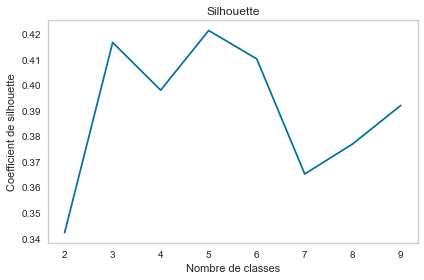

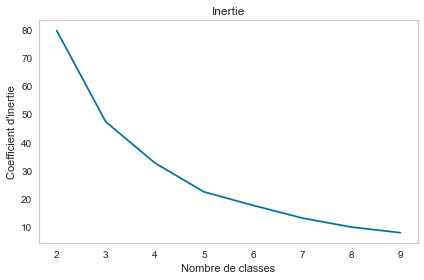

In [82]:
plot_silhouette_inertie(X_pca, range(2,10,1))

* Note: Nombre clusters = 3
* On pouvait s 'y attendre, on enlever un cluster qui était bien typé

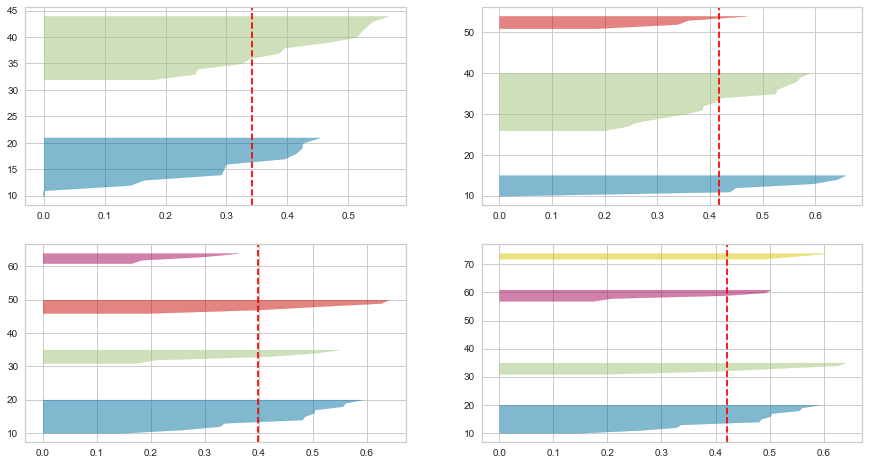

In [67]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_pca)

In [68]:
nbr_cluster = 3
km = KMeans(n_clusters = nbr_cluster, n_init=20, random_state=42)     
# on peut entrainer le modèle et obtenir les labels en meme temps avec fit_predict
prediction = km.fit_predict(X_pca)
prediction

array([1, 1, 0, 1, 2, 1, 2, 2, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1])

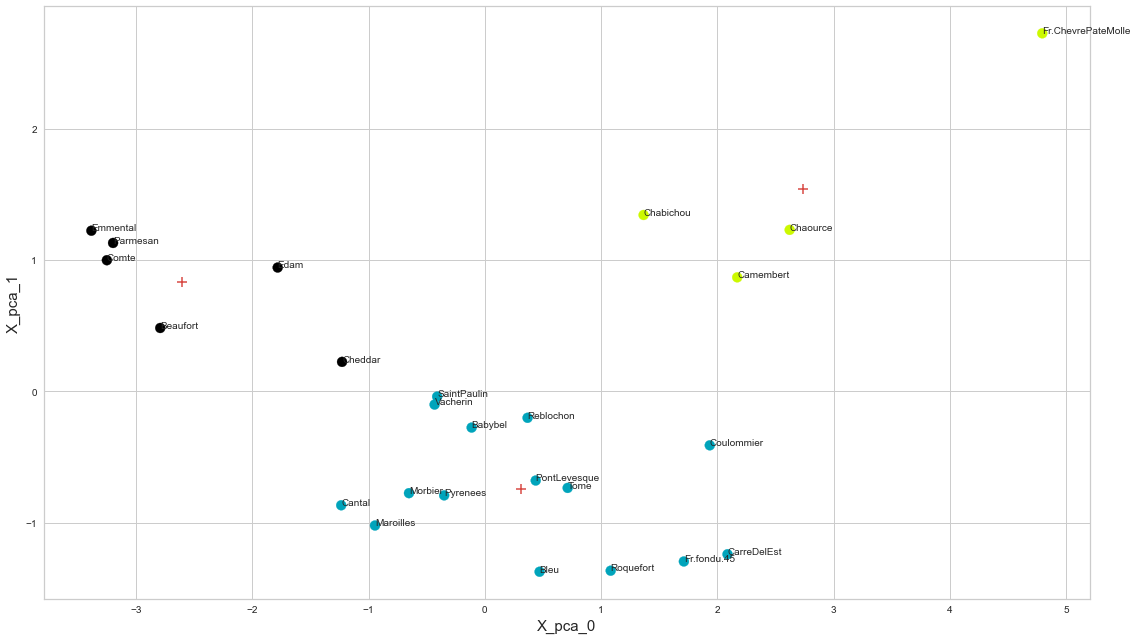

In [69]:
plot_cmpv2(0,1,X_pca,dfstd,prediction)

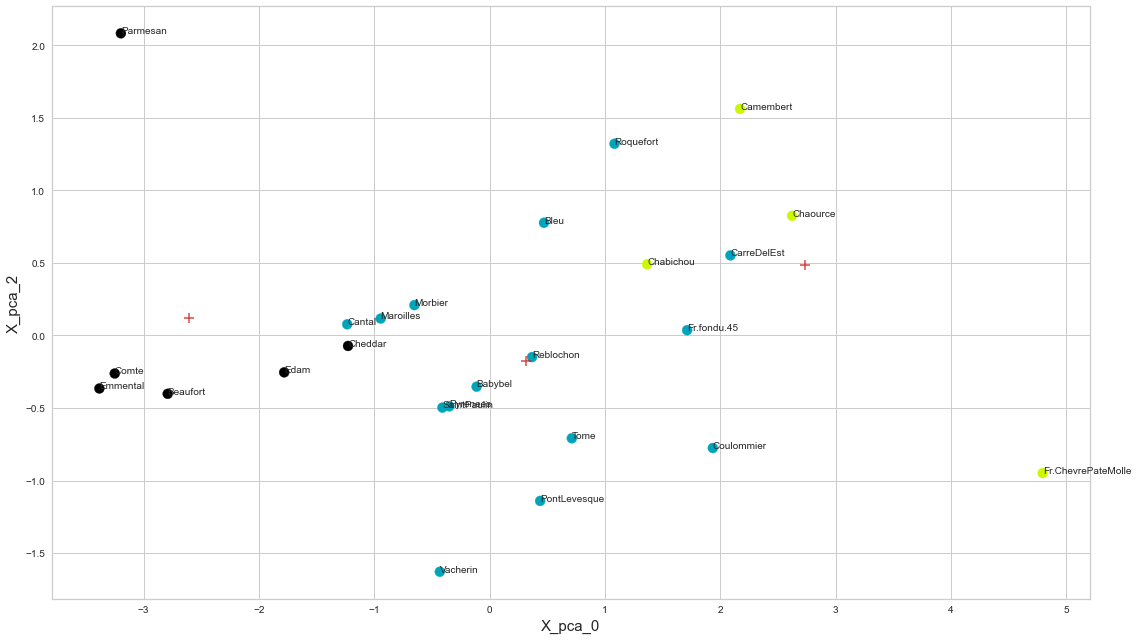

In [70]:
plot_cmpv2(0,2,X_pca,dfstd,prediction)

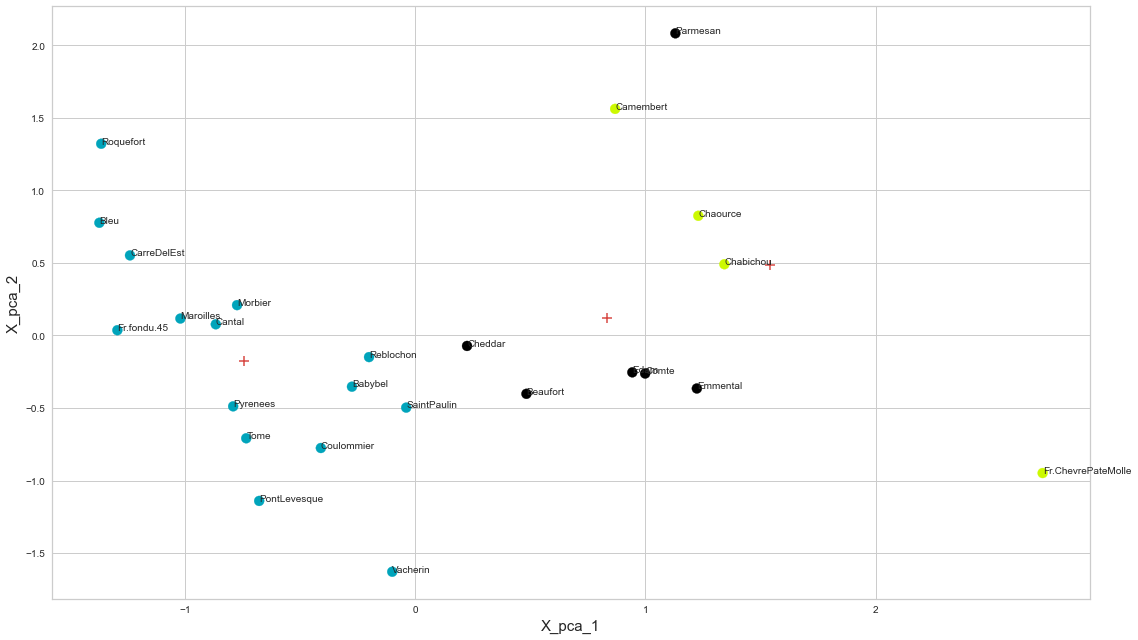

In [71]:
plot_cmpv2(1,2,X_pca,dfstd,prediction)

In [72]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib
nbr_cluster = len(np.unique(prediction))
colors = colors = cm.nipy_spectral(prediction/nbr_cluster)
    
ax = plt.axes(projection = "3d",)
for k in range(nbr_cluster):
    ax.scatter(X_pca[prediction == k,0], X_pca[prediction == k,1], X_pca[prediction == k,2],
               c = colors[prediction == k], s = 100, alpha=0.9, edgecolors="grey", linewidth= 1.5) 

ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], km.cluster_centers_[:,2], c = 'r', marker = '+', s = 100,
               alpha=0.5, linewidth= 1.5)
ax.set_xlabel("X_pca_0")
ax.set_ylabel("X_pca_1")
ax.set_zlabel("X_pca_2")
n=dfstd.shape[0]
for i in range(n):
    ax.text(X_pca[i,0], X_pca[i,1], X_pca[i,2], "%s"%(dfstd.index[i]))

Using matplotlib backend: Qt5Agg


In [73]:
%matplotlib inline

In [74]:
for nbr in range(nbr_cluster):
    print("cluster", nbr)
    print("score silhouette:", metrics.silhouette_score(X_pca, prediction==nbr))
    print("")


cluster 0
score silhouette: 0.39023927492216215

cluster 1
score silhouette: 0.28336531620772254

cluster 2
score silhouette: 0.3968679981450282



In [75]:
distances = km.fit_transform(X_pca)
for label in range(nbr_cluster): 
    print("cluster ", label)
    print("somme_distance:", distances[:,label].sum())
    print("")

cluster  0
somme_distance: 80.74674336710981

cluster  1
somme_distance: 53.48703157935444

cluster  2
somme_distance: 92.91661387587651



In [76]:
for label in np.unique(prediction):
    print("cluster:", label)
    print("nbr_element dans le cluster:", dfstd.groupby(prediction).size()[label])
    print("davies_bouldin_score:",metrics.davies_bouldin_score(dfstd, prediction == label).round(3))
    print("liste d'individus:\n")
    idk=np.argsort(prediction)
    dfname = pd.DataFrame(dfstd.index[idk], prediction[idk])
    dfname[dfname.index == label].apply(lambda x: print(x.values))
    print("="*50)

cluster: 0
nbr_element dans le cluster: 6
davies_bouldin_score: 1.013
liste d'individus:

['Emmental' 'Beaufort' 'Parmesan' 'Cheddar' 'Comte' 'Edam']
cluster: 1
nbr_element dans le cluster: 15
davies_bouldin_score: 2.251
liste d'individus:

['SaintPaulin' 'Roquefort' 'Reblochon' 'Pyrenees' 'PontLevesque' 'Morbier'
 'Maroilles' 'Fr.fondu.45' 'CarreDelEst' 'Tome' 'Coulommier' 'Cantal'
 'Bleu' 'Babybel' 'Vacherin']
cluster: 2
nbr_element dans le cluster: 4
davies_bouldin_score: 1.067
liste d'individus:

['Chaource' 'Chabichou' 'Camembert' 'Fr.ChevrePateMolle']


* Note: 
    * le cluster 2 contient que 3 element!
    * Fr.ChevrePateMolle est vraiment atypique, faut peut etre le supprimer du dataset ou collecter plus de fromages qui lui ressembles

In [77]:
# Afficher les deux moyennes
pd.concat([df.groupby(prediction).mean(), pd.DataFrame(df.mean(),columns = ["Moyenne_totale"]).T])

,Calories,Sodium,Calcium,Retinol,Folates,Proteines,Magnesium
0,382.00,137.333333,262.866667,66.533333,3.416667,28.600000,42.500000
1,326.40,276.500000,184.353333,58.633333,10.313333,20.846667,25.666667
2,276.50,235.500000,127.200000,115.000000,34.050000,17.950000,24.250000
Moyenne_totale,331.76,236.540000,194.052000,69.548000,12.456000,22.244000,29.480000


In [78]:
# Difference des deux moyennes
df.groupby(prediction).mean()-df.mean()

,Calories,Sodium,Calcium,Retinol,Folates,Proteines,Magnesium
0,50.24,-99.206667,68.814667,-3.014667,-9.039333,6.356000,13.020000
1,-5.36,39.960000,-9.698667,-10.914667,-2.142667,-1.397333,-3.813333
2,-55.26,-1.040000,-66.852000,45.452000,21.594000,-4.294000,-5.230000


In [79]:
get_metriques(df, prediction)

,TSS,BSS,R2
Calories,50844.5600,27789.960000,0.546567
Sodium,200810.9600,83008.126667,0.413365
Calcium,123277.0024,47700.471733,0.386937
Retinol,15304.7424,10105.015733,0.660254
Folates,3542.9016,2424.325933,0.684277
Proteines,560.1616,345.434267,0.616669
Magnesium,2430.2400,1344.656667,0.553302


* La moyenne du cluster2 est plus basse que les autres
* les coeff R2 des variables ont perdu, il devient difficile de dire que maintenant ces variables peuvent expliquer ces clusters
* Il est vraiment nécessaire de collecter plus de fromages et de se tourner vers l'expert métier qui peux aider a voir un lien dans ces clusters